# Knowledge Induction

## Data Preprocessing for Association Rules

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the dataset
df = pd.read_csv('Original_ObesityDataSet.csv')

# Create a copy of the dataset
df_set = df.copy()

# Round the float values to the nearest integer and clip to valid ranges
df_set['FCVC'] = df_set['FCVC'].round().astype(int).clip(1, 3)
df_set['NCP'] = df_set['NCP'].round().astype(int).clip(1, 4)
df_set['CH2O'] = df_set['CH2O'].round().astype(int).clip(1, 3)
df_set['FAF'] = df_set['FAF'].round().astype(int).clip(0, 3)
df_set['TUE'] = df_set['TUE'].round().astype(int).clip(0, 3)

# Analyze the transformed distribution of selected attributes


# Map family_history_with_overweight to descriptive strings
df_set['family_history_with_overweight'] = df_set['family_history_with_overweight'].map({
    'yes': 'Overweight_FH=yes', 'no': 'Overweight_FH=no'})


In [2]:
df_set

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,Overweight_FH=yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,Overweight_FH=yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,Overweight_FH=yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,Overweight_FH=no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,Overweight_FH=no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,Overweight_FH=yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,Overweight_FH=yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,Overweight_FH=yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,Overweight_FH=yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
unique_values = df_set['FCVC'].nunique()
print(unique_values)

3


In [4]:
# Columns to transform to see the column names with values to understand rules in a better way

columns_to_transform = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CAEC', 'CALC', 'FAVC', 'SMOKE', 'SCC','Age','Height', 'Weight']

# Transform selected columns
for col in columns_to_transform:
    df_set[col] = df_set[col].apply(lambda x: f"{col}={x}")

In [5]:
df_set

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,Age=21.0,Height=1.62,Weight=64.0,Overweight_FH=yes,FAVC=no,FCVC=2,NCP=3,CAEC=Sometimes,SMOKE=no,CH2O=2,SCC=no,FAF=0,TUE=1,CALC=no,Public_Transportation,Normal_Weight
1,Female,Age=21.0,Height=1.52,Weight=56.0,Overweight_FH=yes,FAVC=no,FCVC=3,NCP=3,CAEC=Sometimes,SMOKE=yes,CH2O=3,SCC=yes,FAF=3,TUE=0,CALC=Sometimes,Public_Transportation,Normal_Weight
2,Male,Age=23.0,Height=1.8,Weight=77.0,Overweight_FH=yes,FAVC=no,FCVC=2,NCP=3,CAEC=Sometimes,SMOKE=no,CH2O=2,SCC=no,FAF=2,TUE=1,CALC=Frequently,Public_Transportation,Normal_Weight
3,Male,Age=27.0,Height=1.8,Weight=87.0,Overweight_FH=no,FAVC=no,FCVC=3,NCP=3,CAEC=Sometimes,SMOKE=no,CH2O=2,SCC=no,FAF=2,TUE=0,CALC=Frequently,Walking,Overweight_Level_I
4,Male,Age=22.0,Height=1.78,Weight=89.8,Overweight_FH=no,FAVC=no,FCVC=2,NCP=1,CAEC=Sometimes,SMOKE=no,CH2O=2,SCC=no,FAF=0,TUE=0,CALC=Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,Age=20.976842,Height=1.71073,Weight=131.408528,Overweight_FH=yes,FAVC=yes,FCVC=3,NCP=3,CAEC=Sometimes,SMOKE=no,CH2O=2,SCC=no,FAF=2,TUE=1,CALC=Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,Age=21.982942,Height=1.748584,Weight=133.742943,Overweight_FH=yes,FAVC=yes,FCVC=3,NCP=3,CAEC=Sometimes,SMOKE=no,CH2O=2,SCC=no,FAF=1,TUE=1,CALC=Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,Age=22.524036,Height=1.752206,Weight=133.689352,Overweight_FH=yes,FAVC=yes,FCVC=3,NCP=3,CAEC=Sometimes,SMOKE=no,CH2O=2,SCC=no,FAF=1,TUE=1,CALC=Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,Age=24.361936,Height=1.73945,Weight=133.346641,Overweight_FH=yes,FAVC=yes,FCVC=3,NCP=3,CAEC=Sometimes,SMOKE=no,CH2O=3,SCC=no,FAF=1,TUE=1,CALC=Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
# Convert the dataframe to a list of transactions
df_set = df_set.applymap(str)
df_transactions = df_set.values.tolist()

In [7]:
print(df_transactions)

[['Female', 'Age=21.0', 'Height=1.62', 'Weight=64.0', 'Overweight_FH=yes', 'FAVC=no', 'FCVC=2', 'NCP=3', 'CAEC=Sometimes', 'SMOKE=no', 'CH2O=2', 'SCC=no', 'FAF=0', 'TUE=1', 'CALC=no', 'Public_Transportation', 'Normal_Weight'], ['Female', 'Age=21.0', 'Height=1.52', 'Weight=56.0', 'Overweight_FH=yes', 'FAVC=no', 'FCVC=3', 'NCP=3', 'CAEC=Sometimes', 'SMOKE=yes', 'CH2O=3', 'SCC=yes', 'FAF=3', 'TUE=0', 'CALC=Sometimes', 'Public_Transportation', 'Normal_Weight'], ['Male', 'Age=23.0', 'Height=1.8', 'Weight=77.0', 'Overweight_FH=yes', 'FAVC=no', 'FCVC=2', 'NCP=3', 'CAEC=Sometimes', 'SMOKE=no', 'CH2O=2', 'SCC=no', 'FAF=2', 'TUE=1', 'CALC=Frequently', 'Public_Transportation', 'Normal_Weight'], ['Male', 'Age=27.0', 'Height=1.8', 'Weight=87.0', 'Overweight_FH=no', 'FAVC=no', 'FCVC=3', 'NCP=3', 'CAEC=Sometimes', 'SMOKE=no', 'CH2O=2', 'SCC=no', 'FAF=2', 'TUE=0', 'CALC=Frequently', 'Walking', 'Overweight_Level_I'], ['Male', 'Age=22.0', 'Height=1.78', 'Weight=89.8', 'Overweight_FH=no', 'FAVC=no', 'FCV

In [8]:
# Encode the transactions using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df_transactions).transform(df_transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [9]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.04, use_colnames=True)
pd.set_option('display.max_colwidth', None)
print(frequent_itemsets.head(10))


    support           itemsets
0  0.060635         (Age=18.0)
1  0.045476         (Age=21.0)
2  0.042160         (Age=23.0)
3  0.047845         (Age=26.0)
4  0.216485       (Automobile)
5  0.114638  (CAEC=Frequently)
6  0.836097   (CAEC=Sometimes)
7  0.663667   (CALC=Sometimes)
8  0.302700          (CALC=no)
9  0.229749           (CH2O=1)


In [10]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print("Generated Rules:")
print(rules)


Generated Rules:
                                       antecedents  \
0                                       (Age=18.0)   
1                                       (Age=18.0)   
2                                       (Age=18.0)   
3                                       (Age=18.0)   
4                                       (Age=18.0)   
...                                            ...   
4971187         (Obesity_Type_III, CALC=Sometimes)   
4971188  (Obesity_Type_III, Public_Transportation)   
4971189               (Obesity_Type_III, SMOKE=no)   
4971190         (Obesity_Type_III, CAEC=Sometimes)   
4971191                         (Obesity_Type_III)   

                                                                                                                                         consequents  \
0                                                                                                                                   (CAEC=Sometimes)   
1                             

# Rules for Normal Weight

In [11]:
# Define the target variable
target = 'Normal_Weight'

In [12]:
# Filter rules to only include those with the target in the RHS
filtered_rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and target in x)]

# Display the filtered rules
print("Filtered Rules:")
print(filtered_rules)


Filtered Rules:
                                                        antecedents  \
533                                              (Overweight_FH=no)   
6600                                   (FAVC=yes, Overweight_FH=no)   
8030                                      (NCP=3, Overweight_FH=no)   
8253                      (Public_Transportation, Overweight_FH=no)   
8257                                     (SCC=no, Overweight_FH=no)   
8262                                   (SMOKE=no, Overweight_FH=no)   
49383                          (FAVC=yes, SCC=no, Overweight_FH=no)   
49393                        (FAVC=yes, SMOKE=no, Overweight_FH=no)   
54559                           (NCP=3, SMOKE=no, Overweight_FH=no)   
55254             (Public_Transportation, SCC=no, Overweight_FH=no)   
55270                          (SCC=no, SMOKE=no, Overweight_FH=no)   
214544               (FAVC=yes, SCC=no, SMOKE=no, Overweight_FH=no)   
225128  (Public_Transportation, SCC=no, SMOKE=no, Overweight_

In [ ]:
# Iterate through filtered_rules and print rules in the desired format
for idx, row in filtered_rules.iterrows():
    antecedents = ', '.join([str(x) for x in list(row['antecedents'])])
    consequents = ', '.join([str(x) for x in list(row['consequents'])])
    
    # Format the rule in the desired form
    rule = f"{{{antecedents}}} -> {{{consequents}}}"
    print(rule)


In [ ]:
# Iterate through filtered_rules and print rules in the desired format
for idx, row in filtered_rules.iterrows():
    antecedents = ', '.join([str(x) for x in list(row['antecedents'])])
    consequents = ', '.join([str(x) for x in list(row['consequents'])])
    
    # Extract support and confidence
    support = row['support']
    confidence = row['confidence']
    
    # Format the rule in the desired form with support and confidence
    rule = f"{{{antecedents}}} -> {{{consequents}}} (support: {support:.4f}, confidence: {confidence:.4f})"
    print(rule)

In [ ]:
# Scatter Plot: Support vs Confidence
plt.figure(figsize=(10, 6))
plt.scatter(filtered_rules['support'], filtered_rules['confidence'], alpha=0.5, edgecolors='w', s=100)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence for Normal_Weight')
plt.grid(True)
plt.show()


In [ ]:
# Plotting the support of the top frequent itemsets
top_frequent_itemsets = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_frequent_itemsets)), top_frequent_itemsets['support'], tick_label=top_frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))))
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets for')
plt.show()


In [ ]:
# Bar Plot: Top 10 Rules by Support
top_rules_by_support = filtered_rules.nlargest(10, 'support')

plt.figure(figsize=(10, 6))
plt.barh(top_rules_by_support['antecedents'].astype(str), top_rules_by_support['support'])
plt.xlabel('Support')
plt.ylabel('Antecedents')
plt.title('Top 10 Rules by Support for Normal_Weight')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Scatter plot of support vs confidence colored by lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()


In [ ]:
import seaborn as sns

# Heatmap of lift for rules involving the target variable
filtered_rules_lift = filtered_rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_rules_lift, annot=True, cmap='viridis')
plt.title('Heatmap of Lift for Rules Involving the Target Variable')
plt.show()


In [ ]:
import networkx as nx

# Network graph of association rules
def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    
    for i in range(rules_to_show):
        antecedent = list(rules.iloc[i]['antecedents'])[0]
        consequent = list(rules.iloc[i]['consequents'])[0]
        
        G.add_nodes_from([antecedent, consequent])
        G.add_edge(antecedent, consequent, weight=rules.iloc[i]['lift'])
        
    pos = nx.spring_layout(G, k=16, scale=2)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Network Graph of Association Rules')
    plt.show()

draw_graph(filtered_rules, 10)  # Adjust the number of rules to show as needed


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Network graph of association rules
def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    
    for i in range(rules_to_show):
        antecedents = list(rules.iloc[i]['antecedents'])
        consequents = list(rules.iloc[i]['consequents'])
        
        for antecedent in antecedents:
            for consequent in consequents:
                G.add_nodes_from([antecedent, consequent])
                G.add_edge(antecedent, consequent, weight=round(rules.iloc[i]['lift'], 2))
        
    pos = nx.spring_layout(G, k=16, scale=2)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Network Graph of Association Rules')
    plt.show()

draw_graph(filtered_rules, 12)  # Adjust the number of rules to show as needed


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Network graph of association rules
def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    
    # Print the number of rules available
    print(f"Total number of filtered rules: {len(rules)}")
    
    # Adjust rules_to_show if there are fewer rules available
    rules_to_show = min(rules_to_show, len(rules))
    
    for i in range(rules_to_show):
        antecedents = list(rules.iloc[i]['antecedents'])
        consequents = list(rules.iloc[i]['consequents'])
        
        for antecedent in antecedents:
            for consequent in consequents:
                G.add_nodes_from([antecedent, consequent])
                G.add_edge(antecedent, consequent, weight=round(rules.iloc[i]['lift'], 2))
        
    pos = nx.spring_layout(G, k=16, scale=2)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Network Graph of Association Rules')
    plt.show()

# Filter rules to only include those with the target in the RHS
target = 'Normal_Weight'
filtered_rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and target in x)]

# Debug print to see filtered rules
print(filtered_rules)

# Draw graph
draw_graph(filtered_rules, 10)  # Adjust the number of rules to show as needed


In [13]:
frequent_itemsets2 = apriori(df_encoded, min_support=0.15, use_colnames=True)
print(frequent_itemsets2)

# Generate association rules
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.95)
print("Generated Rules:")
print(rules2)

# Define the target variable
target2 = 'Obesity_Type_III'

# Filter rules to only include those with the target in the RHS
filtered_rules2 = rules2[rules2['consequents'].apply(lambda x: len(x) == 1 and target2 in x)]

# Display the filtered rules
print("Filtered Rules:")
print(filtered_rules2)


       support  \
0     0.216485   
1     0.836097   
2     0.663667   
3     0.302700   
4     0.229749   
...        ...   
4995  0.152061   
4996  0.152061   
4997  0.152061   
4998  0.152061   
4999  0.152061   

                                                                                                                                             itemsets  
0                                                                                                                                        (Automobile)  
1                                                                                                                                    (CAEC=Sometimes)  
2                                                                                                                                    (CALC=Sometimes)  
3                                                                                                                                           (CALC=no)  
4                      

In [15]:
# Iterate through filtered_rules and print rules in the desired format
for idx, row in filtered_rules2.iterrows():
    antecedents = ', '.join([str(x) for x in list(row['antecedents'])])
    consequents = ', '.join([str(x) for x in list(row['consequents'])])
    
    # Extract support and confidence
    support2 = row['support']
    confidence2 = row['confidence']
    # Format the rule in the desired form
    rule2 = f"{{{antecedents}}} -> {{{consequents}}} (support: {support2:.4f}, confidence: {confidence2:.4f})"
    print(rule2)
    
    

{Female, FCVC=3, NCP=3, Overweight_FH=yes, CALC=Sometimes, Public_Transportation, CAEC=Sometimes} -> {Obesity_Type_III} (support: 0.1525, confidence: 0.9583)
{Female, FCVC=3, NCP=3, Public_Transportation, Overweight_FH=yes, CALC=Sometimes, FAVC=yes} -> {Obesity_Type_III} (support: 0.1525, confidence: 0.9728)
{Female, FCVC=3, NCP=3, SCC=no, Overweight_FH=yes, CALC=Sometimes, Public_Transportation} -> {Obesity_Type_III} (support: 0.1525, confidence: 0.9583)
{Female, FCVC=3, NCP=3, Overweight_FH=yes, CALC=Sometimes, Public_Transportation, SMOKE=no} -> {Obesity_Type_III} (support: 0.1521, confidence: 0.9525)
{Female, FCVC=3, NCP=3, Public_Transportation, Overweight_FH=yes, CALC=Sometimes, FAVC=yes, CAEC=Sometimes} -> {Obesity_Type_III} (support: 0.1525, confidence: 0.9787)
{Female, FCVC=3, NCP=3, SCC=no, Overweight_FH=yes, CALC=Sometimes, Public_Transportation, CAEC=Sometimes} -> {Obesity_Type_III} (support: 0.1525, confidence: 0.9641)
{Female, FCVC=3, NCP=3, Overweight_FH=yes, CALC=Someti

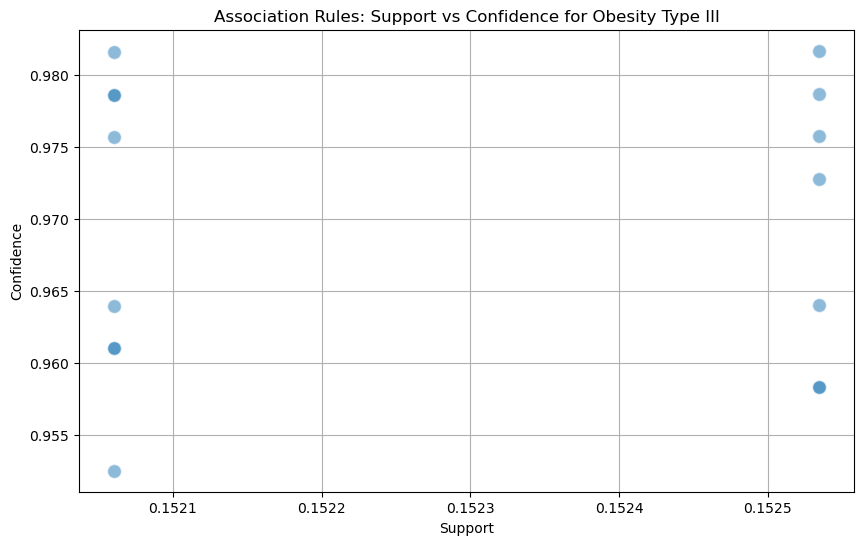

In [16]:
# Scatter Plot: Support vs Confidence
plt.figure(figsize=(10, 6))
plt.scatter(filtered_rules2['support'], filtered_rules2['confidence'], alpha=0.5, edgecolors='w', s=100)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence for Obesity Type III')
plt.grid(True)
plt.show()

In [ ]:
# Bar Plot: Top 10 Rules by Support
top_rules_by_support2 = filtered_rules2.nlargest(10, 'support')

plt.figure(figsize=(10, 6))
plt.barh(top_rules_by_support2['antecedents'].astype(str), top_rules_by_support['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Antecedents')
plt.title('Top 10 Rules by Support for Normal_Weight')
plt.gca().invert_yaxis()
plt.show()